## 8.6 다변수정규분포

$D$차원 **다변수정규분포(MVN: multivariate Gaussian normal distribution)**의 확률밀도함수는 평균벡터 $\mu$ 와 공분산행렬 $\Sigma$ 라는 두 개의 모수를 가지며 다음과 같은 수식으로 정의한다. 

$$
\begin{align}
\mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma| ^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
\tag{8.6.1}
\end{align}
$$

이 식에서 각 기호의 의미는 다음과 같다.

* $x \in \mathbf{R}^D $ 확률변수벡터
* $\mu \in \mathbf{R}^D $ 평균벡터
* $\Sigma \in \mathbf{R}^{D\times D} $ 공분산행렬


다변수정규분포에서 공분산행렬은 양의 정부호인 대칭행렬이어야 한다. 따라서 역행렬이 항상 존재한다. 공분산행렬의 역행렬 $\Sigma^{-1}$을 정밀도행렬(precision matrix)이라고 한다.


#### 예제


다음과 같은 2차원($D=2$) 다변수정규분포를 생각하자. 2차원이므로 확률변수벡터는 
$$ 
\begin{align}
x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}
\tag{8.6.2}
\end{align}
$$
이다.

만약 모수가 다음과 같다고 하자.

$$ 
\begin{align}
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
\tag{8.6.3}
\end{align}
$$

공분산행렬로부터 $x_1$과 $x_2$가 독립이라는 것을 알 수 있다. 확률밀도함수를 구하면 다음과 같다.

$$ 
\begin{align}
| \Sigma| = 1. \;\;\;
\Sigma^{-1} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}
\tag{8.6.4}
\end{align}
$$

$$ 
\begin{align}
\begin{aligned}
(x-\mu)^T \Sigma^{-1} (x-\mu) 
&=  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix} \\
&=
(x_1 - 2)^2 + (x_2 - 3)^2
\end{aligned}
\tag{8.6.5}
\end{align}
$$

$$
\begin{align}
\mathcal{N}(x_1, x_2) = \dfrac{1}{2\pi}
\exp \left( -\dfrac{1}{2} \left( (x_1 - 2)^2 + (x_2 - 3)^2 \right) \right)
\tag{8.6.6}
\end{align}
$$

확률밀도함수값이 같은 등고선은 원이 된다. 

$$ 
\begin{align}
(x_1 - 2)^2 + (x_2 - 3)^2 = r^2
\tag{8.6.7}
\end{align}
$$

사이파이의 stats 서브패키지는 다변수정규분포를 위한 `multivariate_normal()` 명령을 제공한다. `mean` 인수로 평균벡터를, `cov` 인수로 공분산행렬을 받는다. `multivariate_normal()` 명령으로 위 확률밀도함수를 그리고 랜덤 표본을 생성하면 다음 그림과 같다.

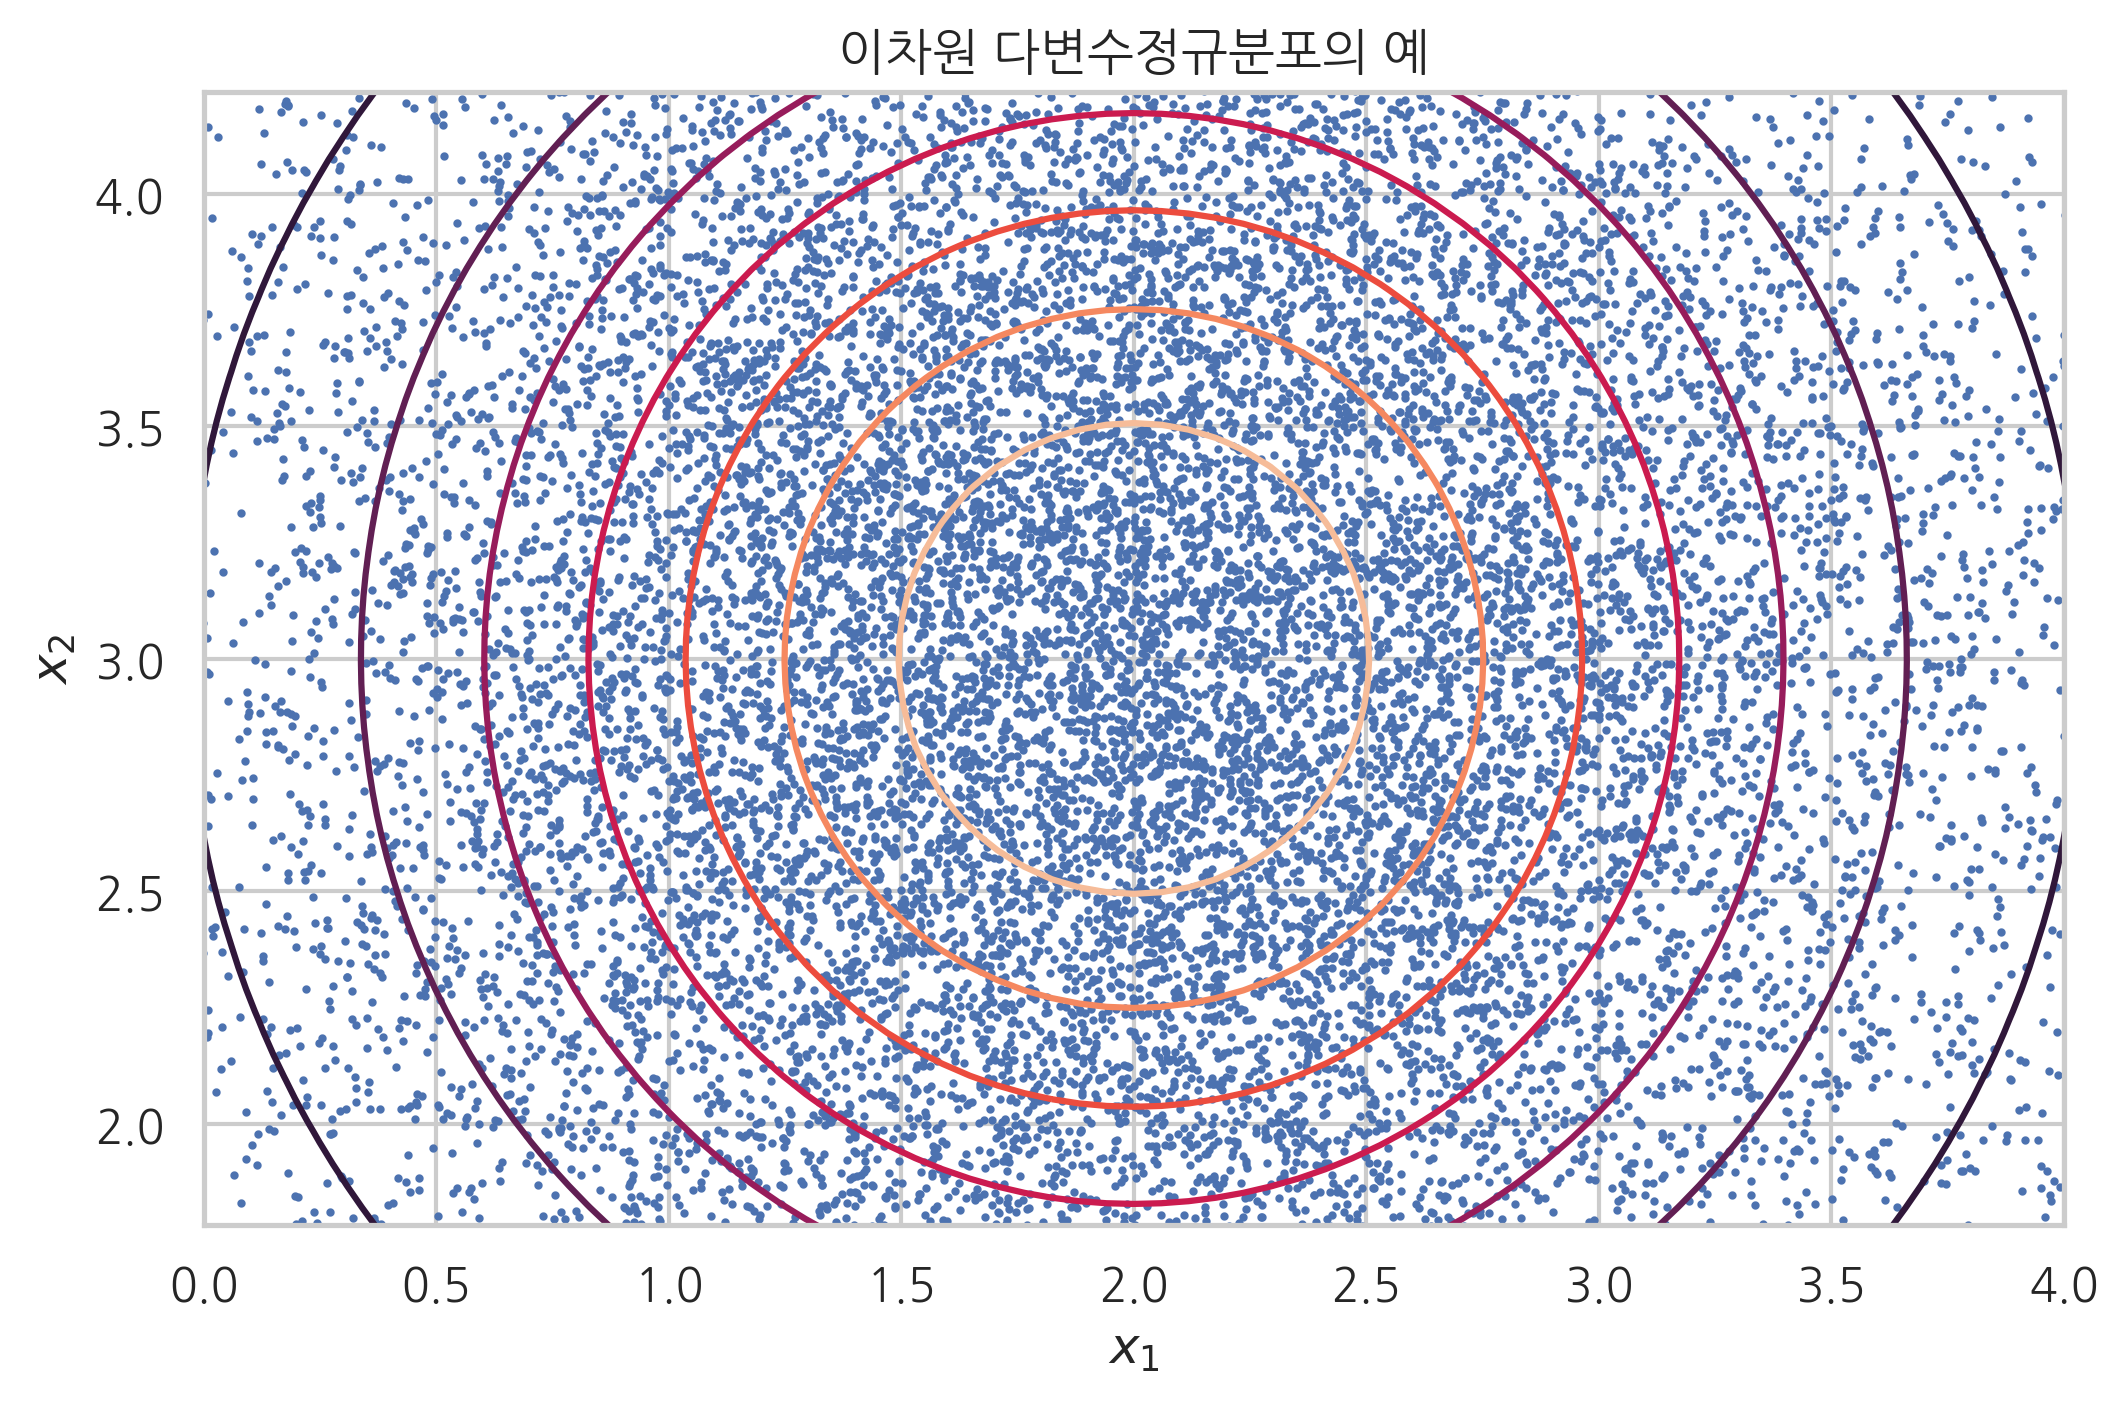

In [1]:
mu = [2, 3]
cov = [[1, 0], [0, 1]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(20000)

xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 4)
plt.ylim(2, 4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차원 다변수정규분포의 예")
plt.show()

#### 예제

만약 모수가 다음과 같다고 하자. 공분산행렬로부터 $x_1$과 $x_2$가 양의 상관관계가 있다는 것을 알 수 있다.

$$ 
\begin{align}
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}2 & 3 \\ 3 & 7 \end{bmatrix} 
\tag{8.6.8}
\end{align}
$$

이 때 확률밀도함수는 다음과 같다.

$$ 
\begin{align}
|\Sigma| = 5,\;\;\;
\Sigma^{-1} = \begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4 \end{bmatrix}
\tag{8.6.9}
\end{align}
$$

$$ 
\begin{align}
\begin{aligned}
(x-\mu)^T \Sigma^{-1} (x-\mu) 
&=  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4\end{bmatrix}
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix} \\
&=
\dfrac{7}{5}(x_1 - 2)^2 - \dfrac{6}{5}(x_1 - 2)(x_2 - 3) + \dfrac{2}{5}(x_2 - 3)^2
\end{aligned}
\tag{8.6.10}
\end{align}
$$

$$
\begin{align}
\mathcal{N}(x_1, x_2) = \dfrac{1}{2\sqrt{5}\pi}
\exp \left( \dfrac{7}{5}(x_1 - 2)^2 - \dfrac{6}{5}(x_1 - 2)(x_2 - 3) + \dfrac{2}{5}(x_2 - 3)^2 \right)
\tag{8.6.11}
\end{align}
$$

이 확률밀도함수의 모양은 다음과 같이 회전변환된 타원 모양이 된다.

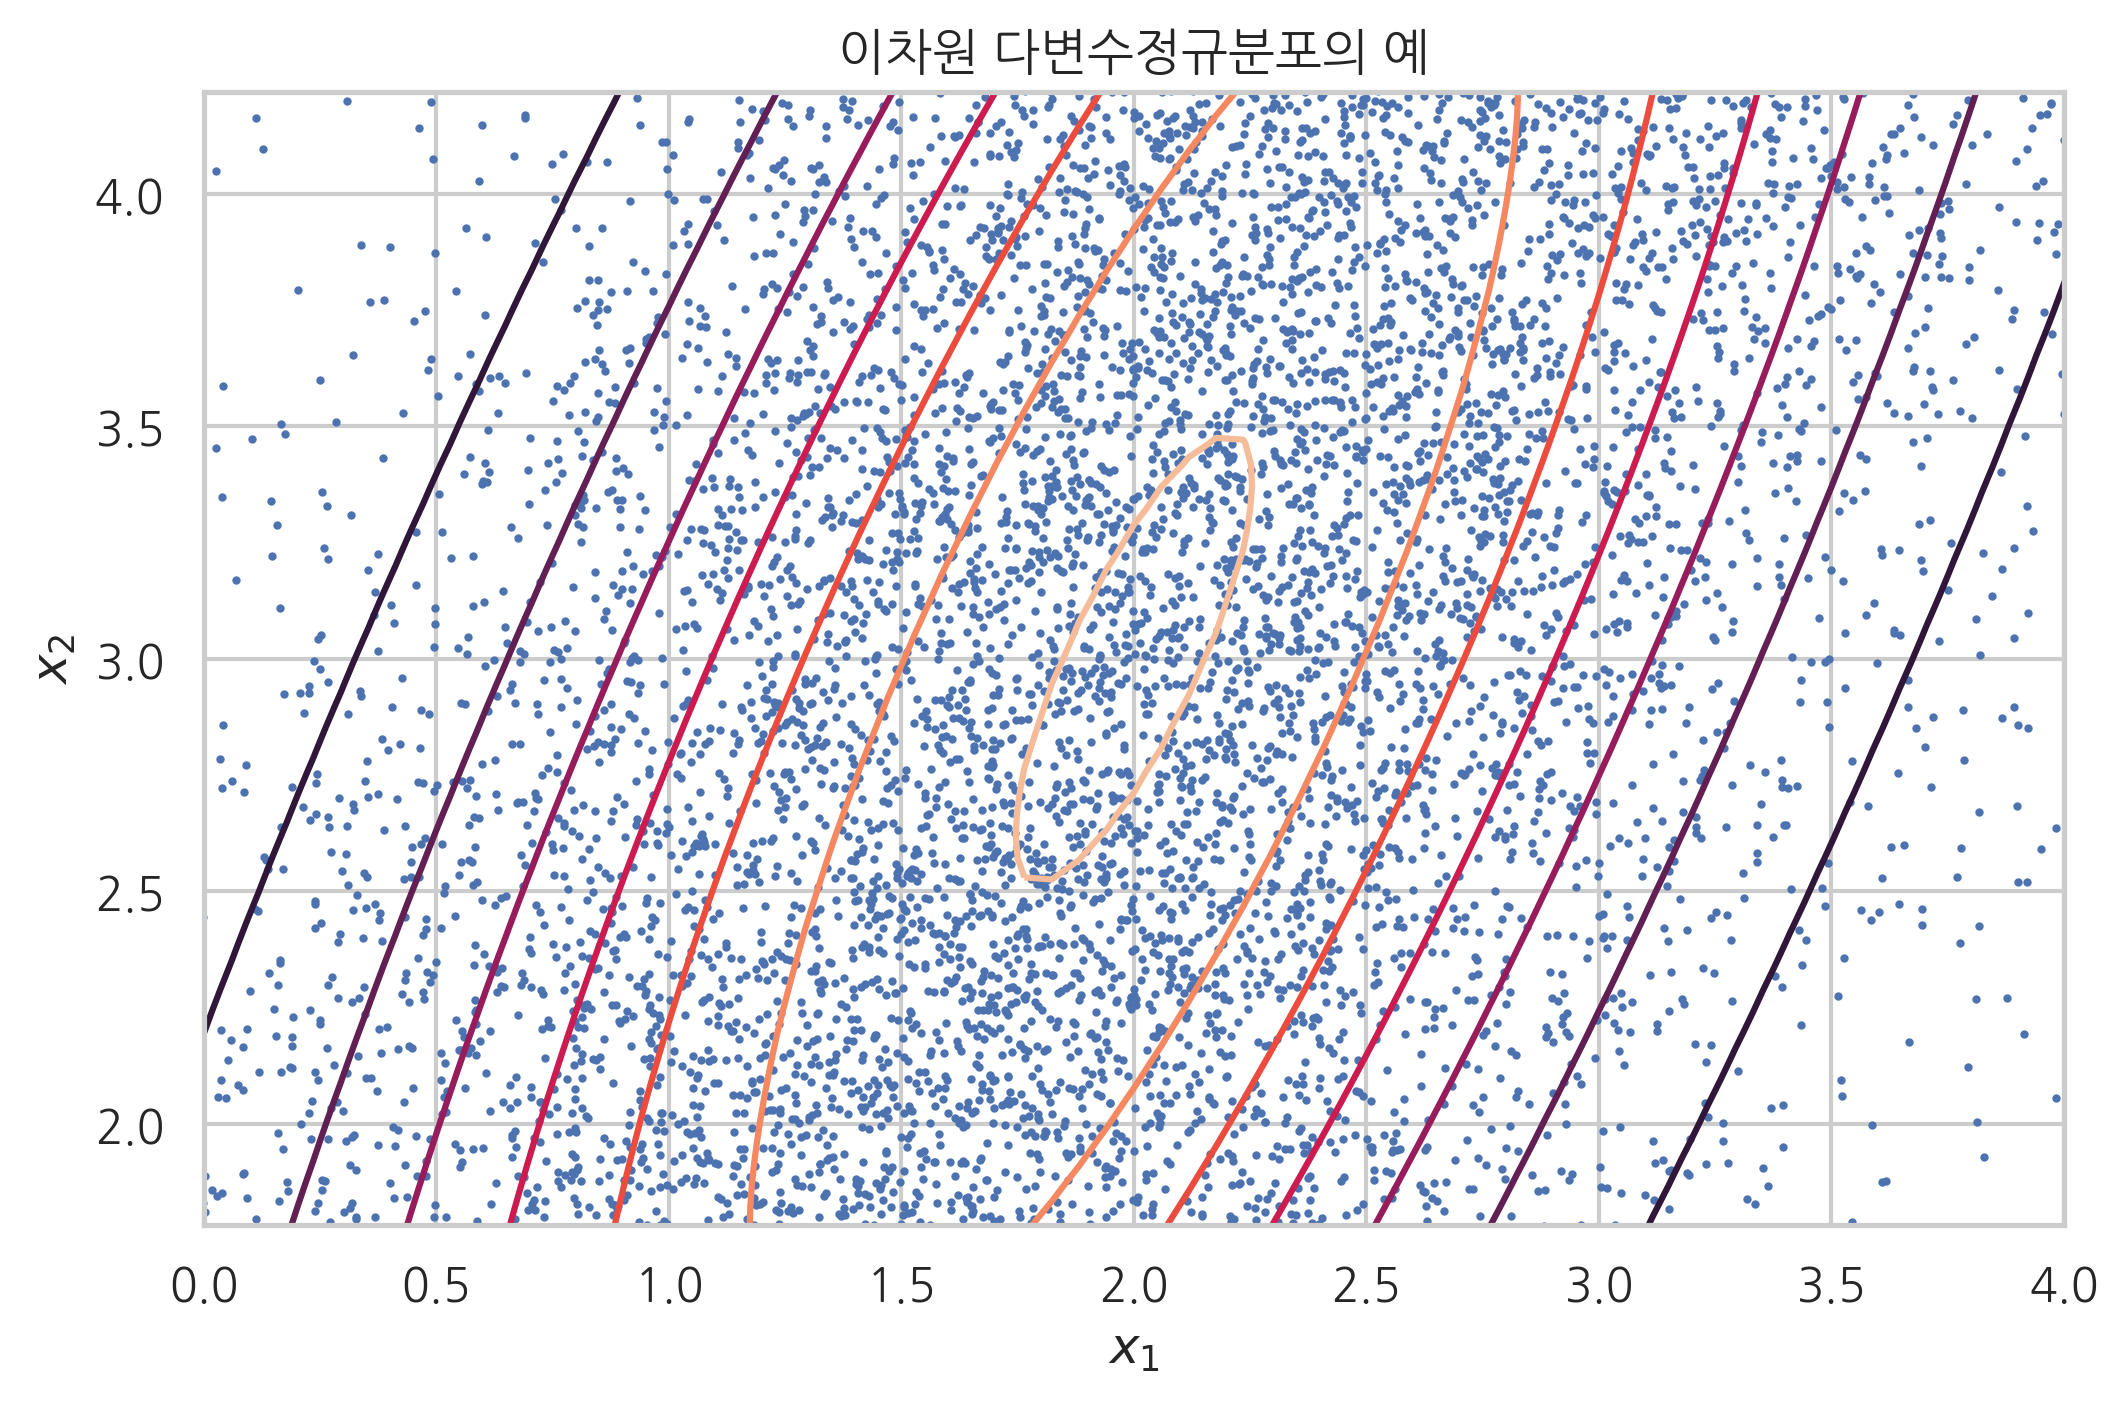

In [2]:
mu = [2, 3]
cov = [[2, 3], [3, 7]]

rv = sp.stats.multivariate_normal(mu, cov)
X = rv.rvs(20000)

xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.scatter(X[:, 0], X[:, 1], s=1)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 4)
plt.ylim(2, 4)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차원 다변수정규분포의 예")
plt.show()

### 다변수정규분포와 고윳값 분해

다변수정규분포의 공분산행렬 $\Sigma$은 양의 정부호인 대칭행렬이므로 대각화가능(diagonalizable)이다. 정밀도행렬 $\Sigma^{-1}$은 다음처럼 분해할 수 있다. 이 식에서 $\Lambda$는 고윳값행렬, $V$는 고유벡터행렬이다.

$$
\begin{align}
\Sigma^{-1} = V \Lambda^{-1} V^T
\tag{8.6.12}
\end{align}
$$

이를 이용하면 확률밀도함수는 다음처럼 좌표 변환할 수 있다.

$$
\begin{align}
\begin{aligned}
\mathcal{N}(x) 
&\propto \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&= \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&= \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
&= \exp \left( -\dfrac{1}{2} (V^{-1}(x-\mu))^T  \Lambda^{-1} (V^{-1} (x-\mu)) \right) \\
\end{aligned}
\tag{8.6.13}
\end{align}
$$

이 식에서 
$$
\begin{align}
x' = V^{-1}(x-\mu)
\tag{8.6.14}
\end{align}
$$

라고 하자. 이 식은 변환행렬 $V^{-1}$의 열벡터인 고유벡터를 새로운 축으로 가지도록 회전하고 $\mu$벡터 방향으로 평행이동하는 것을 뜻한다.

최종 확률밀도함수식은 다음과 같다. 이 식에서 $\Lambda$는 고윳값 $\lambda_i$를 대각성분으로 가지는 대각행렬이므로 새로운 좌표 $x'$에서 확률밀도함수는 타원이 된다. 타원의 반지름은 고윳값 크기에 비례한다. 반대로 이야기하면 원래 좌표에서 확률밀도함수는 $\mu$를 중심으로 가지고 고윳값에 비례하는 반지름을 가진 타원을 고유벡터 방향으로 회전시킨 모양이다. 

$$
\begin{align}
\begin{aligned}
\mathcal{N}(x) 
&\propto \exp \left( -\dfrac{1}{2} x'^T  \Lambda^{-1} x' \right) \\
&\propto \exp \left( \dfrac{{x'}_1^2}{\lambda_1^2} + \dfrac{{x'}_2^2}{\lambda_2^2} + \cdots + \dfrac{{x'}_D^2}{\lambda_D^2} \right)
\end{aligned}
\tag{8.6.15}
\end{align}
$$

예를 들어 위의 두번째 예제에서 공분산행렬을 고유분해하면 다음과 같다.

In [3]:
mu = [2, 3]
cov = [[4, 3], [3, 5]]
w, V = np.linalg.eig(cov)

고윳값은 $\lambda_1=1.46$, $\lambda_2=7.54$다. 

In [4]:
w

array([1.45861873, 7.54138127])

고유벡터는 $v_1 = (-0.763, 0.646)$, $v_2 = (-0.646, -0.763)$이다. 

In [5]:
V

array([[-0.76301998, -0.6463749 ],
       [ 0.6463749 , -0.76301998]])

따라서 확률밀도함수가 고유벡터 $v_1 = (-0.763, 0.646)$와 $v_2 = (-0.646, -0.763)$를 축으로하는 타원형임을 알 수 있다

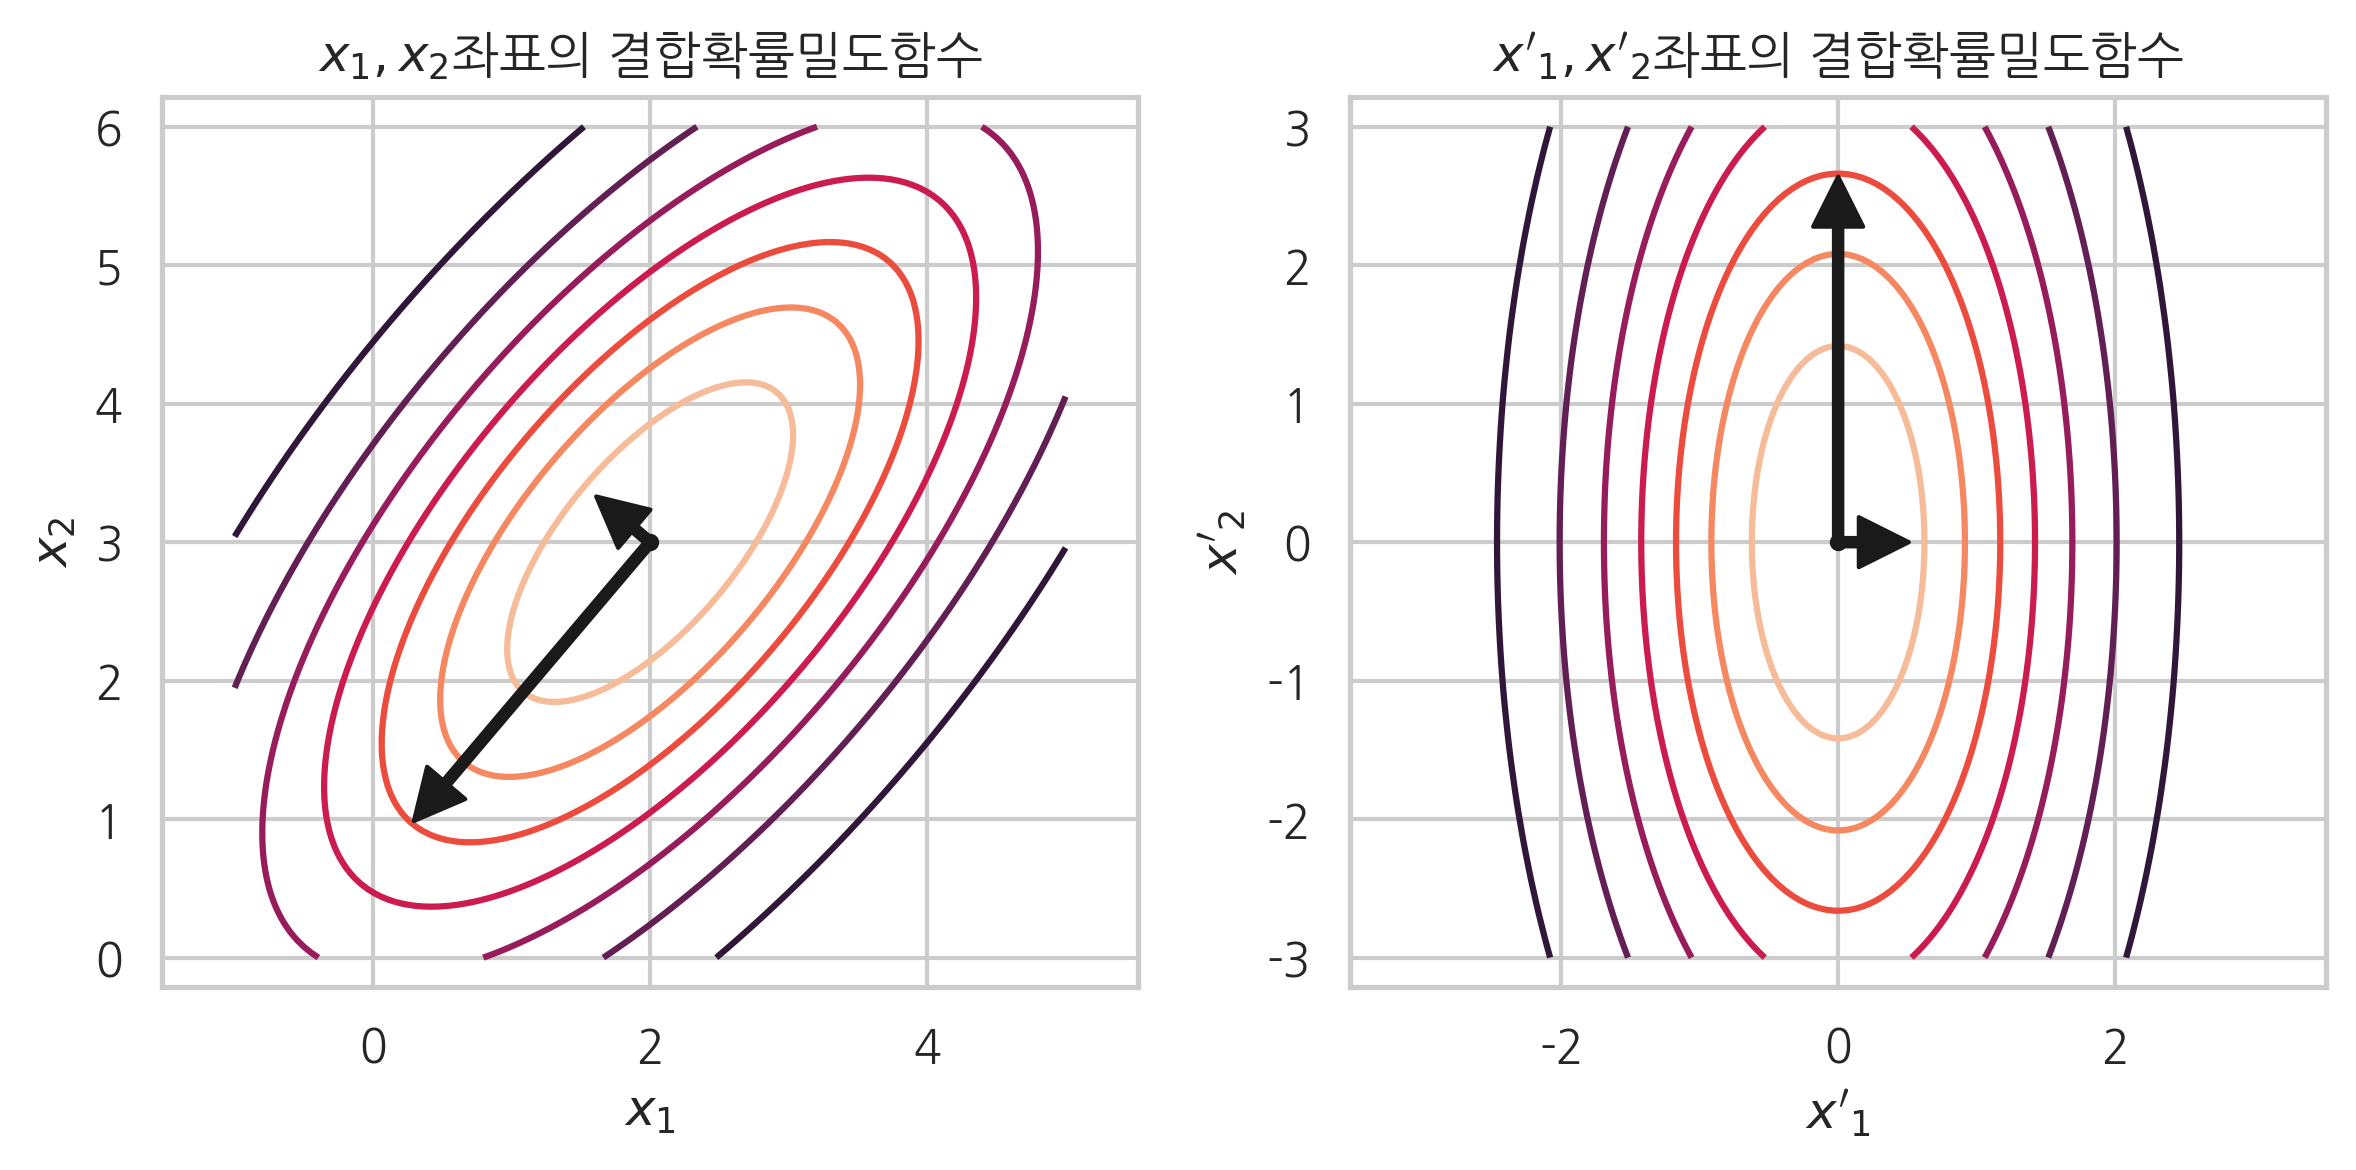

In [6]:
plt.figure(figsize=(8, 4))

d = dict(facecolor="k", edgecolor="k", width=2)

plt.subplot(121)
xx = np.linspace(-1, 5, 120)
yy = np.linspace(0, 6, 150)
XX, YY = np.meshgrid(xx, yy)
rv1 = sp.stats.multivariate_normal(mu, cov)
plt.contour(XX, YY, rv1.pdf(np.dstack([XX, YY])))
plt.annotate("", xy=(mu + 0.35 * w[0] * V[:, 0]), xytext=mu, arrowprops=d)
plt.annotate("", xy=(mu + 0.35 * w[1] * V[:, 1]), xytext=mu, arrowprops=d)
plt.scatter(mu[0], mu[1], s=10, c="k")
plt.axis("equal")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("$x_1,x_2$좌표의 결합확률밀도함수")

plt.subplot(122)
xx = np.linspace(-3, 3, 120)
yy = np.linspace(-3, 3, 150)
XX, YY = np.meshgrid(xx, yy)
rv2 = sp.stats.multivariate_normal((0,0), w)  # 좌표 변환
plt.contour(XX, YY, rv2.pdf(np.dstack([XX, YY])))
plt.annotate("", xy=(0.35 * w[0] * np.array([1, 0])), xytext=(0,0), arrowprops=d)
plt.annotate("", xy=(0.35 * w[1] * np.array([0, 1])), xytext=(0,0), arrowprops=d)
plt.scatter(0, 0, s=10, c="k")
plt.axis("equal")
plt.xlabel("$x'_1$")
plt.ylabel("$x'_2$")
plt.title("$x'_1,x'_2$좌표의 결합확률밀도함수")

plt.tight_layout()
plt.show()

#### 연습 문제 8.6.1

다음과 같은 평균벡터와 공분산행렬을 가지는 2차원 다변수정규분포의 확률밀도함수의 모양은 어떻게 되는가?

$$ 
\begin{align}
\mu = \begin{bmatrix} 1 \\ 2 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}4 & -3 \\ -3 & 4 \end{bmatrix} 
\tag{8.6.16}
\end{align}
$$


### 다변수정규분포의 조건부확률분포

> **[정리] 다변수정규분포인 확률변수벡터 중 어떤 원소의 값이 주어지면 다른 확률변수의 조건부확률분포는 다변수정규분포다.** 

즉 다변수정규분포 확률밀도함수를 자른 단면은 다변수정규분포가 된다.

예를 들어 확률변수 $X$의 값 $x$를 두 벡터 $x_1$과 $x_2$로 나누었을 때 

$$ 
\begin{align}
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
\tag{8.6.17}
\end{align}
$$

$x_2$값이 주어지면(관측되면), $X_1$만의 확률밀도함수가 다변수정규분포를 이루는 것을 증명하자.

$x_1$과 $x_2$에 따라 기댓값벡터도 $\mu_1$과 $\mu_2$로 나뉘어진다.
$$ 
\begin{align}
\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}
\tag{8.6.18}
\end{align}
$$

공분산행렬 $\Sigma$도 다음처럼 나뉘어진다.

$$
\begin{align}
\Sigma = 
\begin{bmatrix}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{21} & \Sigma_{22} \\
\end{bmatrix}
\tag{8.6.19}
\end{align}
$$

공분산행렬의 역행렬인 정밀도행렬 $\Lambda$도 마찬가지로 분할한다.

$$
\begin{align}
\Lambda = \Sigma^{-1} = 
\begin{bmatrix}
\Lambda_{11} & \Lambda_{12} \\
\Lambda_{21} & \Lambda_{22} \\
\end{bmatrix}
\tag{8.6.20}
\end{align}
$$

이 때 $\Sigma$와 $\Lambda$가 대칭행렬이므로 $\Lambda_{11}$와 $\Lambda_{22}$도 대칭행렬이고 $\Lambda_{12}=\Lambda_{21}$이다.

이를 적용하면 

$$
\begin{align}
\begin{aligned}
&(x-\mu)^T\Sigma^{-1}(x-\mu) = 
(x_1 - \mu_{1|2})^T\Lambda_{11}(x_1 - \mu_{1|2}) + C(x_2,\mu,\Sigma) \\
\end{aligned}
\tag{8.6.21}
\end{align}
$$

가 된다. 이 식에서 조건부기댓값 $\mu_{1|2}$는

$$
\begin{align}
\mu_{1|2} = \mu_1 -\Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2)
\tag{8.6.22}
\end{align}
$$ 

이다. $C$는 $x_1$을 포함하지 않은 항을 가리키며 다음과 같다.

$$
\begin{align}
\begin{aligned}
C 
&= \mu_1^T\Lambda_{11}\mu_1 -2\mu_1^T\Lambda_{12}(x_2-\mu_2) + (x_2-\mu_2)^T\Lambda_{22}(x_2-\mu_2)\\
&  - (x_2-\mu_2)^T \Lambda_{12}^T \Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2)
\end{aligned}
\tag{8.6.23}
\end{align}
$$

이 식에 지수함수를 적용하면

$$
\begin{align}
p(x_1 | x_2) = C' \exp \left( (x_1 - \mu_{1|2})^T\Lambda_{11}(x_1 - \mu_{1|2}) \right)
\tag{8.6.24}
\end{align}
$$

가 된다. 이 식에서 $C' = \exp C$다.

즉 $x_2$가 어떤 값으로 주어지면 $x_1$은 조건부기댓값 $\mu_{1|2}$와 조건부공분산행렬 $\Sigma_{1|2}$를 가지는 다변수정규분포가 된다. $\Sigma_{1|2}$은 분할행렬의 역행렬공식으로부터 다음과 같다.

$$
\begin{align}
\Sigma_{1|2} = \Lambda_{11}^{-1} = \Sigma_{11} − \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}
\tag{8.6.25}
\end{align}
$$

<img src="https://datascienceschool.net/upfiles/223b61b9c9724061b120abd29dd74242.png" width="100%;"/>

그림 8.6.1 : 다변수정규분포의 조건부확률분포

### 다변수정규분포의 주변확률분포

> **[정리] 다변수정규분포의 주변확률분포는 다변수정규분포다.** 


즉 결합확률밀도함수를 어떤 확률변수의 값으로 적분하여 나머지 확률변수의 주변확률분포를 구하면 다변수정규분포이다. 예를 들어 $x_1$과 $x_2$로 이루어진 결합 확률밀도함수 $p(x_1, x_2)$를 $x_2$로 적분하면 $x_1$의 주변확률분포는 정규분포가 된다.

$$
\begin{align}
p(x_1) = \int p(x_1, x_2) dx_2 = \mathcal{N}(x_1; \mu_1, \Sigma_{11})
\tag{8.6.26}
\end{align}
$$

$x_2$의 주변확률분포는의 기댓값은 원래 기댓값벡터 중 $x_1$ 성분과 같고 공분산행렬은 분할행렬 중 $\Sigma_{11}$성분과 같다. 증명은 생략한다.

#### 연습 문제 8.6.2

2차원 다변수정규분포가 다음과 같은 모수를 가진다고 하자.

$$
\begin{align}
\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}
,\;\;
\Sigma = 
\begin{bmatrix}
\sigma_1^2           & \rho\sigma_1\sigma_2 \\
\rho\sigma_1\sigma_2 & \sigma_2^2           \\
\end{bmatrix}
\tag{8.6.27}
\end{align}
$$

(1) $x_2$가 주어졌을 때 $x_1$의 조건부확률분포함수가 다음과 같음을 보여라.

$$
\begin{align}
\mathcal{N} \left(x_1 \; \Big\vert \; 
\mu_1 + \dfrac{\rho\sigma_1\sigma_2}{\sigma_2^2}(x_2 - \mu_2),
\sigma_1^2 - \dfrac{(\rho\sigma_1\sigma_2)^2}{\sigma_2^2}
\right)
\tag{8.6.28}
\end{align}
$$